In [1]:
# Import beberapa modul untuk digunakan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
from PIL import Image
import matplotlib.image as mpimg
from zipfile import ZipFile
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
import pandas as pd

In [2]:
# Install Data From Kaggle
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"candrajuliussinaga","key":"f1b5e10673fde9255b882ba2af119a93"}'}

In [4]:
# Make directory & Change Permission Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
# Download Dataset From kaggle
!kaggle datasets download -d ruopengan/11-common-nut-types-for-image-classification

100% 4.36G/4.36G [04:10<00:00, 19.1MB/s]
100% 4.36G/4.36G [04:10<00:00, 18.7MB/s]


In [6]:
# Extrak ZIP From Kaggle
file_name = '/content/11-common-nut-types-for-image-classification.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Selesai mengekstrak zip')

Selesai mengekstrak zip


In [7]:
base_dir = '/content/Nuts/Nuts/train'

In [8]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
  counting = len(os.listdir(os.path.join(base_dir,i)))
  number_label[i] = counting
  total_files += counting
  print('Total Files: ',str(total_files))
print('Jumlah semua file yang ada pada dataset : ',str(total_files))

Total Files:  120
Total Files:  240
Total Files:  360
Total Files:  480
Total Files:  600
Total Files:  720
Total Files:  840
Total Files:  960
Total Files:  1080
Total Files:  1200
Total Files:  1320
Jumlah semua file yang ada pada dataset :  1320


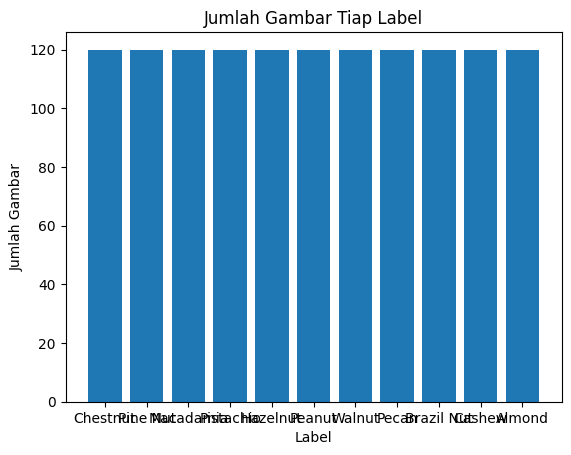

In [9]:
plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

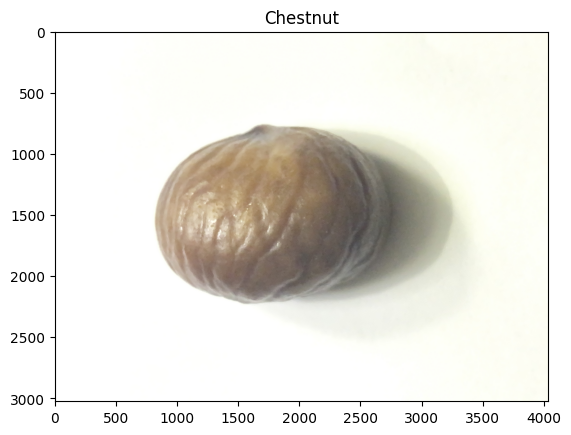

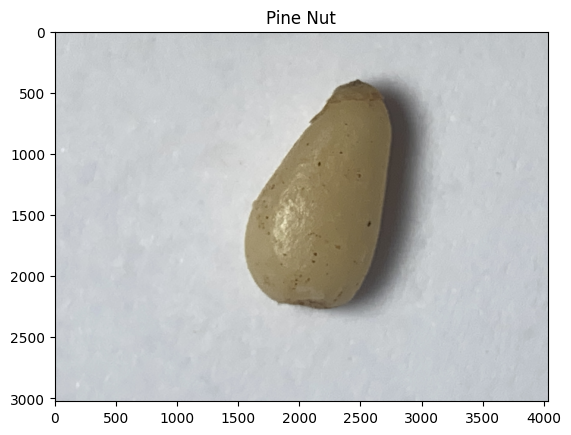

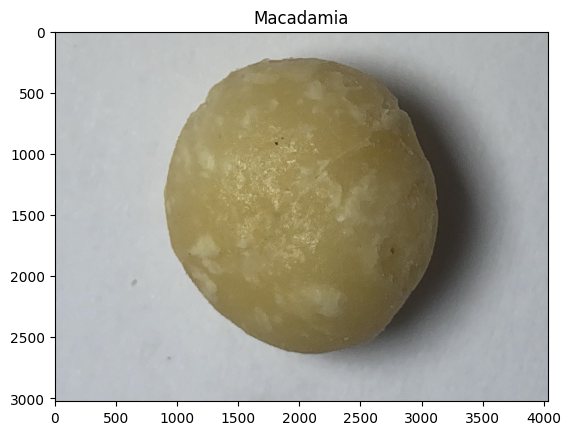

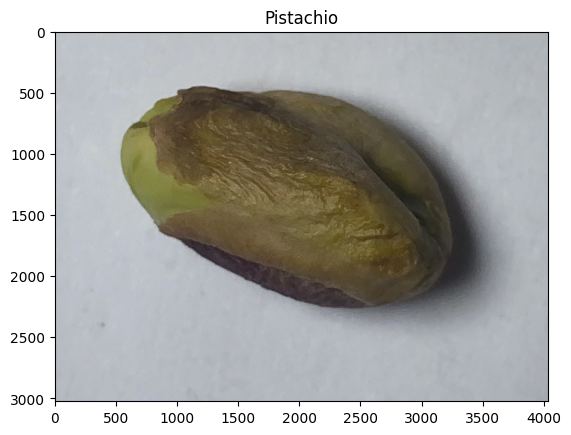

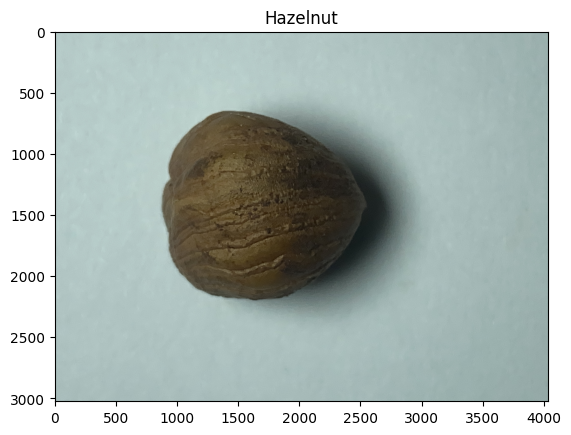

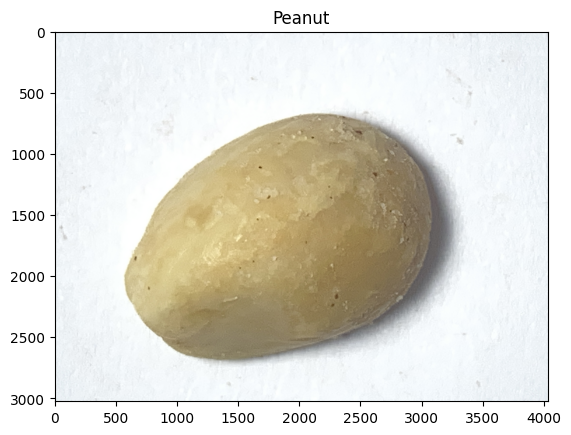

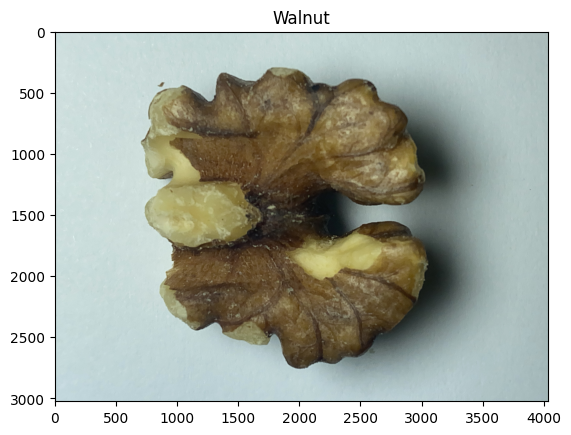

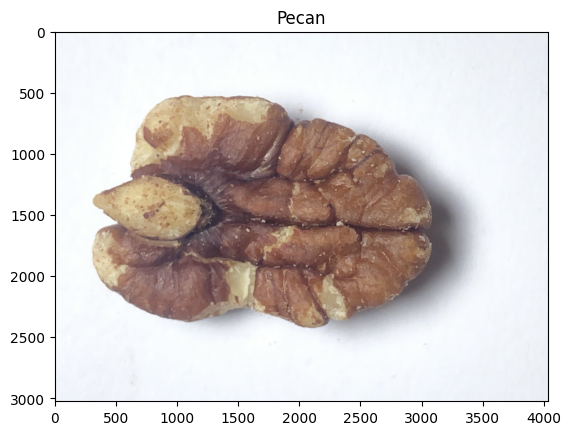

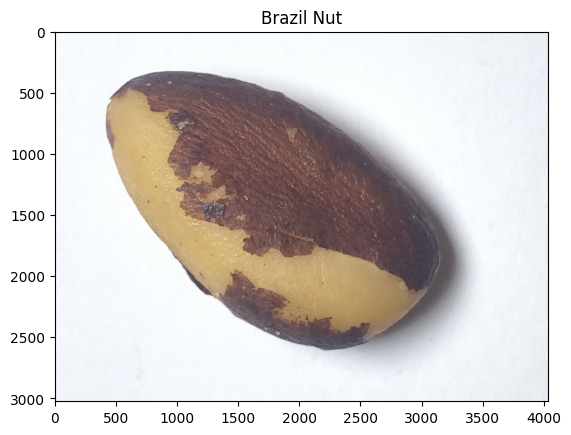

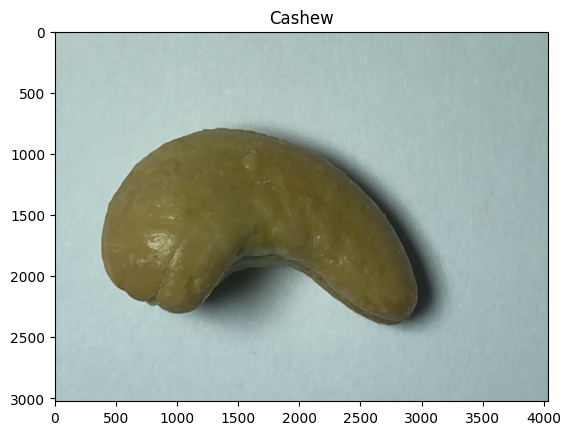

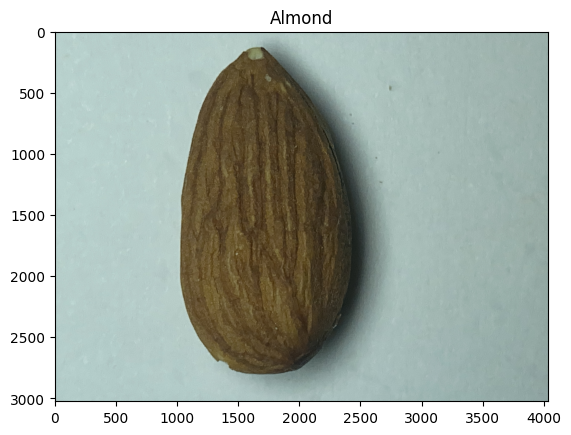

In [10]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [11]:
# Membuat directory train dan val stelah itu menggabungkan setiap direktori kedalam train dan val
# lalu membuat sub direktori
train = 'train'
val = 'val'
base_dir_content = '/content/Nuts'
train_dir = os.path.join(base_dir_content,train)
validation_dir = os.path.join(base_dir_content,val)

almond_dir = os.path.join(base_dir,'Almond')
brazi_nut_dir = os.path.join(base_dir,'Brazil Nut')
cashew_dir = os.path.join(base_dir,'Cashew')
chestnut_dir = os.path.join(base_dir,'Chestnut')
hazelnut_dir = os.path.join(base_dir,'Hazelnut')
macademia_dir = os.path.join(base_dir,'Macadamia')
peanut_dir = os.path.join(base_dir,'Peanut')
pecan_dir = os.path.join(base_dir,'Pecan')
pine_nut_dir = os.path.join(base_dir,'Pine Nut')
pistachio_dir = os.path.join(base_dir,'Pistachio')
walnut_dir = os.path.join(base_dir,'Walnut')

In [12]:
# Mentraining data yang ada di subdirektori
print('total training Almond images ', len(os.listdir(almond_dir)))
print('total training Brazil Nut images ', len(os.listdir(brazi_nut_dir)))
print('total training Cashew images ', len(os.listdir(cashew_dir)))
print('total training Chestnut images ', len(os.listdir(chestnut_dir)))
print('total training Hazelnut images ', len(os.listdir(hazelnut_dir)))
print('total training Macadamia images ', len(os.listdir(macademia_dir)))
print('total training Peanut images ', len(os.listdir(peanut_dir)))
print('total training Pecan images ', len(os.listdir(pecan_dir)))
print('total training Pine Nut images ', len(os.listdir(pine_nut_dir)))
print('total training Pistachio images ', len(os.listdir(pistachio_dir)))
print('total training Walnut images ', len(os.listdir(walnut_dir)))

total training Almond images  120
total training Brazil Nut images  120
total training Cashew images  120
total training Chestnut images  120
total training Hazelnut images  120
total training Macadamia images  120
total training Peanut images  120
total training Pecan images  120
total training Pine Nut images  120
total training Pistachio images  120
total training Walnut images  120


In [13]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [14]:
train_almond = os.path.join(train_dir,'Almond')
train_brazil_nut = os.path.join(train_dir,'Brazil Nut')
train_cashew = os.path.join(train_dir,'Cashew')
train_chestnut = os.path.join(train_dir,'Chestnut')
train_hazelnut = os.path.join(train_dir,'Hazelnut')
train_macadamia = os.path.join(train_dir,'Macadamia')
train_peanut = os.path.join(train_dir,'Peanut')
train_pecan = os.path.join(train_dir,'Pecan')
train_pine_nut = os.path.join(train_dir,'Pine Nut')
train_pistachio = os.path.join(train_dir,'Pistachio')
train_walnut = os.path.join(train_dir,'Walnut')

In [15]:
os.mkdir(train_almond)
os.mkdir(train_brazil_nut)
os.mkdir(train_cashew)
os.mkdir(train_chestnut)
os.mkdir(train_hazelnut)
os.mkdir(train_macadamia)
os.mkdir(train_peanut)
os.mkdir(train_pecan)
os.mkdir(train_pine_nut)
os.mkdir(train_pistachio)
os.mkdir(train_walnut)

In [16]:
# Memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_almond_dir, val_almond_dir = train_test_split(os.listdir(almond_dir),test_size=0.40)
train_brazil_nut_dir, val_brazil_nut_dir = train_test_split(os.listdir(brazi_nut_dir),test_size=0.40)
train_cashew_nut_dir, val_cashew_nut_dir = train_test_split(os.listdir(cashew_dir),test_size=0.40)
train_chestnut_dir, val_chestnut_dir = train_test_split(os.listdir(chestnut_dir),test_size=0.40)
train_hazelnut_dir, val_hazelnut_dir = train_test_split(os.listdir(hazelnut_dir),test_size=0.40)
train_macadamia_dir, val_macadamia_dir = train_test_split(os.listdir(macademia_dir),test_size=0.40)
train_peanut_dir, val_peanut_dir = train_test_split(os.listdir(peanut_dir),test_size=0.40)
train_pecan_dir, val_pecan_dir = train_test_split(os.listdir(pecan_dir),test_size=0.40)
train_pine_nut_dir, val_pine_nut_dir = train_test_split(os.listdir(pine_nut_dir),test_size=0.40)
train_pistachio_dir, val_pistachio_dir = train_test_split(os.listdir(pistachio_dir),test_size=0.40)
train_walnut_dir, val_walnut_dir = train_test_split(os.listdir(walnut_dir),test_size=0.40)

In [17]:
val_almond = os.path.join(validation_dir,'Almond')
val_brazil_nut = os.path.join(validation_dir,'Brazil Nut')
val_cashew = os.path.join(validation_dir,'Cashew')
val_chestnut = os.path.join(validation_dir,'Chestnut')
val_hazelnut = os.path.join(validation_dir,'Hazelnut')
val_macadamia = os.path.join(validation_dir,'Macadamia')
val_peanut = os.path.join(validation_dir,'Peanut')
val_pecan = os.path.join(validation_dir,'Pecan')
val_pine_nut = os.path.join(validation_dir,'Pine Nut')
val_pistachio = os.path.join(validation_dir,'Pistachio')
val_walnut = os.path.join(validation_dir,'Walnut')

In [18]:
os.mkdir(val_almond)
os.mkdir(val_brazil_nut)
os.mkdir(val_cashew)
os.mkdir(val_chestnut)
os.mkdir(val_hazelnut)
os.mkdir(val_macadamia)
os.mkdir(val_peanut)
os.mkdir(val_pecan)
os.mkdir(val_pine_nut)
os.mkdir(val_pistachio)
os.mkdir(val_walnut)

In [19]:
# Mengcopy file yang datanya sudah di train dan divalidasi kedalam sebuah directori baru Train
for file in train_almond_dir:
  shutil.copy(os.path.join(almond_dir,file),os.path.join(train_almond,file))
for file in train_brazil_nut_dir:
  shutil.copy(os.path.join(brazi_nut_dir,file),os.path.join(train_brazil_nut,file))
for file in train_cashew_nut_dir:
  shutil.copy(os.path.join(cashew_dir,file),os.path.join(train_cashew,file))
for file in train_chestnut_dir:
  shutil.copy(os.path.join(chestnut_dir,file),os.path.join(train_chestnut,file))
for file in train_hazelnut_dir:
  shutil.copy(os.path.join(hazelnut_dir,file),os.path.join(train_hazelnut,file))
for file in train_macadamia_dir:
  shutil.copy(os.path.join(macademia_dir,file),os.path.join(train_macadamia,file))
for file in train_peanut_dir:
  shutil.copy(os.path.join(peanut_dir,file),os.path.join(train_peanut,file))
for file in train_pecan_dir:
  shutil.copy(os.path.join(pecan_dir,file),os.path.join(train_pecan,file))
for file in train_pine_nut_dir:
  shutil.copy(os.path.join(pine_nut_dir,file),os.path.join(train_pine_nut,file))
for file in train_pistachio_dir:
  shutil.copy(os.path.join(pistachio_dir,file),os.path.join(train_pistachio,file))
for file in train_walnut_dir:
  shutil.copy(os.path.join(walnut_dir,file),os.path.join(train_walnut,file))

In [20]:
# Mengcopy file yang datanya sudah di train dan divalidasi kedalam sebuah directori baru Val
for file in val_almond_dir:
  shutil.copy(os.path.join(almond_dir,file),os.path.join(val_almond))
for file in val_brazil_nut_dir:
  shutil.copy(os.path.join(brazi_nut_dir,file),os.path.join(val_brazil_nut))
for file in val_cashew_nut_dir:
  shutil.copy(os.path.join(cashew_dir,file),os.path.join(val_cashew))
for file in val_chestnut_dir:
  shutil.copy(os.path.join(chestnut_dir,file),os.path.join(val_chestnut))
for file in val_hazelnut_dir:
  shutil.copy(os.path.join(hazelnut_dir,file),os.path.join(val_hazelnut))
for file in val_macadamia_dir:
  shutil.copy(os.path.join(macademia_dir,file),os.path.join(val_macadamia))
for file in val_peanut_dir:
  shutil.copy(os.path.join(peanut_dir,file),os.path.join(val_peanut))
for file in val_pecan_dir:
  shutil.copy(os.path.join(pecan_dir,file),os.path.join(val_pecan))
for file in val_pine_nut_dir:
  shutil.copy(os.path.join(pine_nut_dir,file),os.path.join(val_pine_nut))
for file in val_pistachio_dir:
  shutil.copy(os.path.join(pistachio_dir,file),os.path.join(val_pistachio))
for file in val_walnut_dir:
  shutil.copy(os.path.join(walnut_dir,file),os.path.join(val_walnut))

In [21]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest')

In [22]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=preprocess_input)

In [23]:
training_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size= 32,
    class_mode='categorical'
)

Found 792 images belonging to 11 classes.


In [24]:
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(300,300),
    batch_size=32,
    class_mode='categorical',
    )

Found 528 images belonging to 11 classes.


In [26]:
# Membangun model menggunakan arsitektur InceptionV3
input_shape = (300,300,3)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

87910968/87910968 [==============================] - 6s 0us/step


In [40]:
num_classes = 11
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
model = Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='elu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16))
model.add(Dense(num_classes, activation='softmax'))

In [28]:
# Melihat arsitektur CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 8, 8, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 batch_normalization_94 (Bat  (None, 131072)           524288    
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 1024)              134218752 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                        

In [48]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
class CNNCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.65):
      print("\nAkurasi di atas 85%, hentikan training nya Sekarang yaaa!")
      self.model.stop_training = True

In [31]:
# melakukan pelatihan model.
callbacks = CNNCallback()
# melakukan pelatihan model.
history = model.fit(training_generator,
                              steps_per_epoch=25,
                              validation_data=test_generator,
                              validation_steps=5,
                              epochs=40,
                              verbose=1,
                              callbacks =[callbacks])

Epoch 1/40
25/25 [==============================] - 248s 8s/step - loss: 2.2442 - accuracy: 0.5316 - val_loss: 63.8118 - val_accuracy: 0.0688
Epoch 2/40
25/25 [==============================] - 183s 7s/step - loss: 1.3751 - accuracy: 0.7096 - val_loss: 227.7812 - val_accuracy: 0.1125
Epoch 3/40
25/25 [==============================] - 184s 7s/step - loss: 1.2373 - accuracy: 0.7285 - val_loss: 6100.4155 - val_accuracy: 0.0875
Epoch 4/40
25/25 [==============================] - 187s 8s/step - loss: 0.6806 - accuracy: 0.8295 - val_loss: 71.0759 - val_accuracy: 0.0938
Epoch 5/40
25/25 [==============================] - 186s 8s/step - loss: 0.4469 - accuracy: 0.8914 - val_loss: 990.0832 - val_accuracy: 0.1000
Epoch 6/40
25/25 [==============================] - 187s 8s/step - loss: 0.5672 - accuracy: 0.8725 - val_loss: 402.3831 - val_accuracy: 0.0812
Epoch 7/40
25/25 [==============================] - 179s 7s/step - loss: 0.5279 - accuracy: 0.8952 - val_loss: 3.0971 - val_accuracy: 0.0938
Ep

In [32]:
test_score = model.evaluate_generator( training_generator)
print("[INFO] accuracy training: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss training: ",test_score[0])

<ipython-input-32-266dc9ec93c8>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator( training_generator)


[INFO] accuracy training: 84.97%
[INFO] Loss training:  0.692326009273529


In [33]:
test_scroe = model.evaluate(test_generator)
print("[INFO] accuracy validasi test: {:.2f}%".format(test_scroe[1] * 100))
print("[INFO] Loss validasi test: ",test_scroe[0])

17/17 [==============================] - 87s 5s/step - loss: 3.9536 - accuracy: 0.0909
[INFO] accuracy validasi test: 9.09%
[INFO] Loss validasi test:  3.953629970550537


In [65]:
import numpy as np
# Membuat prediksi pada data uji
y_pred = model.predict(training_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

25/25 [==============================] - 155s 6s/step


In [67]:
y_true_train = training_generator.classes

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true_train, y_pred_classes)

In [69]:
print(cm)

[[ 0 11  0  0  0  0 10 51  0  0  0]
 [ 0 15  0  0  0  0 13 43  0  1  0]
 [ 1 14  0  0  0  0  9 48  0  0  0]
 [ 1 12  0  0  0  0  4 55  0  0  0]
 [ 0 13  0  0  0  0  6 53  0  0  0]
 [ 0 11  0  0  0  0  6 54  1  0  0]
 [ 0 11  0  0  0  0  7 53  1  0  0]
 [ 1  9  0  0  0  0  7 55  0  0  0]
 [ 0  8  0  0  0  1  7 55  0  1  0]
 [ 0 14  0  1  0  0 11 46  0  0  0]
 [ 1  7  0  0  0  0  9 55  0  0  0]]


In [70]:
labels = ['almond','brazil nut','cashew','chestnut', 'hazelnut','macadamia','peanut','pecan','pine nut','pistachio','walnut']


# Check point
# Showing labels
print(labels)

['almond', 'brazil nut', 'cashew', 'chestnut', 'hazelnut', 'macadamia', 'peanut', 'pecan', 'pine nut', 'pistachio', 'walnut']


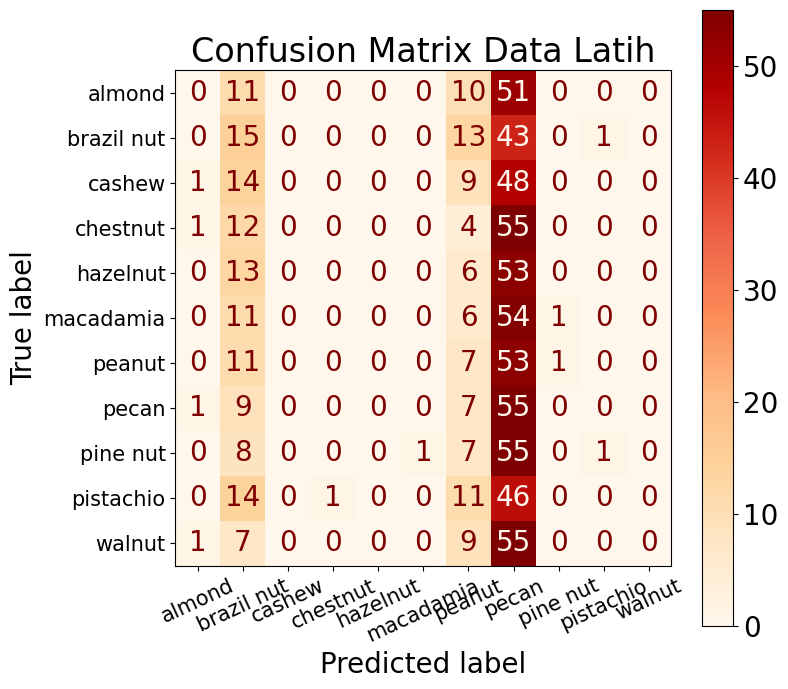

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 20
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)
# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Giving name to the plot
plt.title('Confusion Matrix Data Latih', fontsize=24)
# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
# Showing the plot
plt.show()

In [72]:
# Showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(training_generator.classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.12      0.21      0.15        72
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00        72
           5       0.00      0.00      0.00        72
           6       0.08      0.10      0.09        72
           7       0.10      0.76      0.17        72
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00        72
          10       0.00      0.00      0.00        72

    accuracy                           0.10       792
   macro avg       0.03      0.10      0.04       792
weighted avg       0.03      0.10      0.04       792



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
test_dataset = "/content/Nuts/Nuts/val"

In [51]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1.0/255)

In [52]:
IMG_WIDTH = 300
IMG_HEIGHT = 300
BATCH_SIZE = 32
test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 440 images belonging to 11 classes.


In [53]:
predictions = model.predict(test_generator)

14/14 [==============================] - 74s 5s/step


In [54]:
test_loss, test_accuracy = model.evaluate(test_generator)

14/14 [==============================] - 69s 5s/step - loss: 2.4436 - accuracy: 0.0909


In [60]:
print("[INFO] Test Loss: {:.2f}%".format(test_loss))
print("[INFO] Loss Akurasi: {:.2f}%".format(test_accuracy * 100))

[INFO] Test Loss: 2.44%
[INFO] Loss Akurasi: 9.09%


In [74]:
import numpy as np
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

In [75]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm_testing = confusion_matrix(y_true, y_pred)

In [64]:
print(cm)

[[ 0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]]


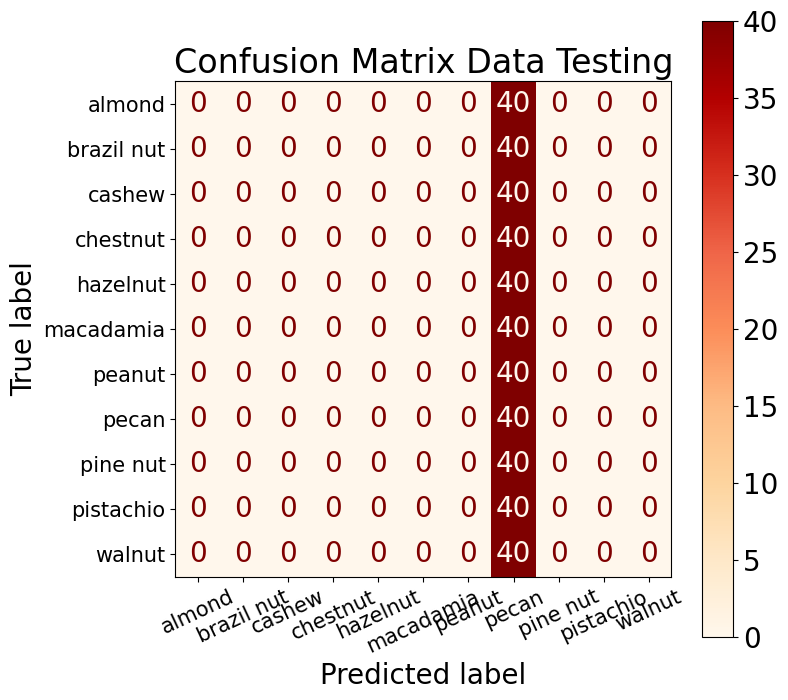

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 20
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(cm_testing, display_labels=labels)
# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Giving name to the plot
plt.title('Confusion Matrix Data Testing', fontsize=24)
# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
# Showing the plot
plt.show()

In [77]:
# Laporan metrics pada data testing
print(classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        40
           7       0.09      1.00      0.17        40
           8       0.00      0.00      0.00        40
           9       0.00      0.00      0.00        40
          10       0.00      0.00      0.00        40

    accuracy                           0.09       440
   macro avg       0.01      0.09      0.02       440
weighted avg       0.01      0.09      0.02       440



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
